# Predicting Student Academic Success or Dropout

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [3]:
df = pd.read_csv('Data/Dropout_Academic_Success.csv', delimiter=',')
display(df)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Exploratory data analysis

In [8]:
df.describe().round(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,...,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00
mean,1.18,18.67,1.73,8856.64,0.89,4.58,132.61,1.87,19.56,22.28,...,0.14,0.54,6.23,8.06,4.44,10.23,0.15,11.57,1.23,0.00
std,0.61,17.48,1.31,2063.57,0.31,10.22,13.19,6.91,15.60,15.34,...,0.69,1.92,2.20,3.95,3.01,5.21,0.75,2.66,1.38,2.27
min,1.00,1.00,0.00,33.00,0.00,1.00,95.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.60,-0.80,-4.06
25%,1.00,1.00,1.00,9085.00,1.00,1.00,125.00,1.00,2.00,3.00,...,0.00,0.00,5.00,6.00,2.00,10.75,0.00,9.40,0.30,-1.70
50%,1.00,17.00,1.00,9238.00,1.00,1.00,133.10,1.00,19.00,19.00,...,0.00,0.00,6.00,8.00,5.00,12.20,0.00,11.10,1.40,0.32
75%,1.00,39.00,2.00,9556.00,1.00,1.00,140.00,1.00,37.00,37.00,...,0.00,0.00,7.00,10.00,6.00,13.33,0.00,13.90,2.60,1.79
max,6.00,57.00,9.00,9991.00,1.00,43.00,190.00,109.00,44.00,44.00,...,12.00,19.00,23.00,33.00,20.00,18.57,12.00,16.20,3.70,3.51


In [9]:
#Checking null values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

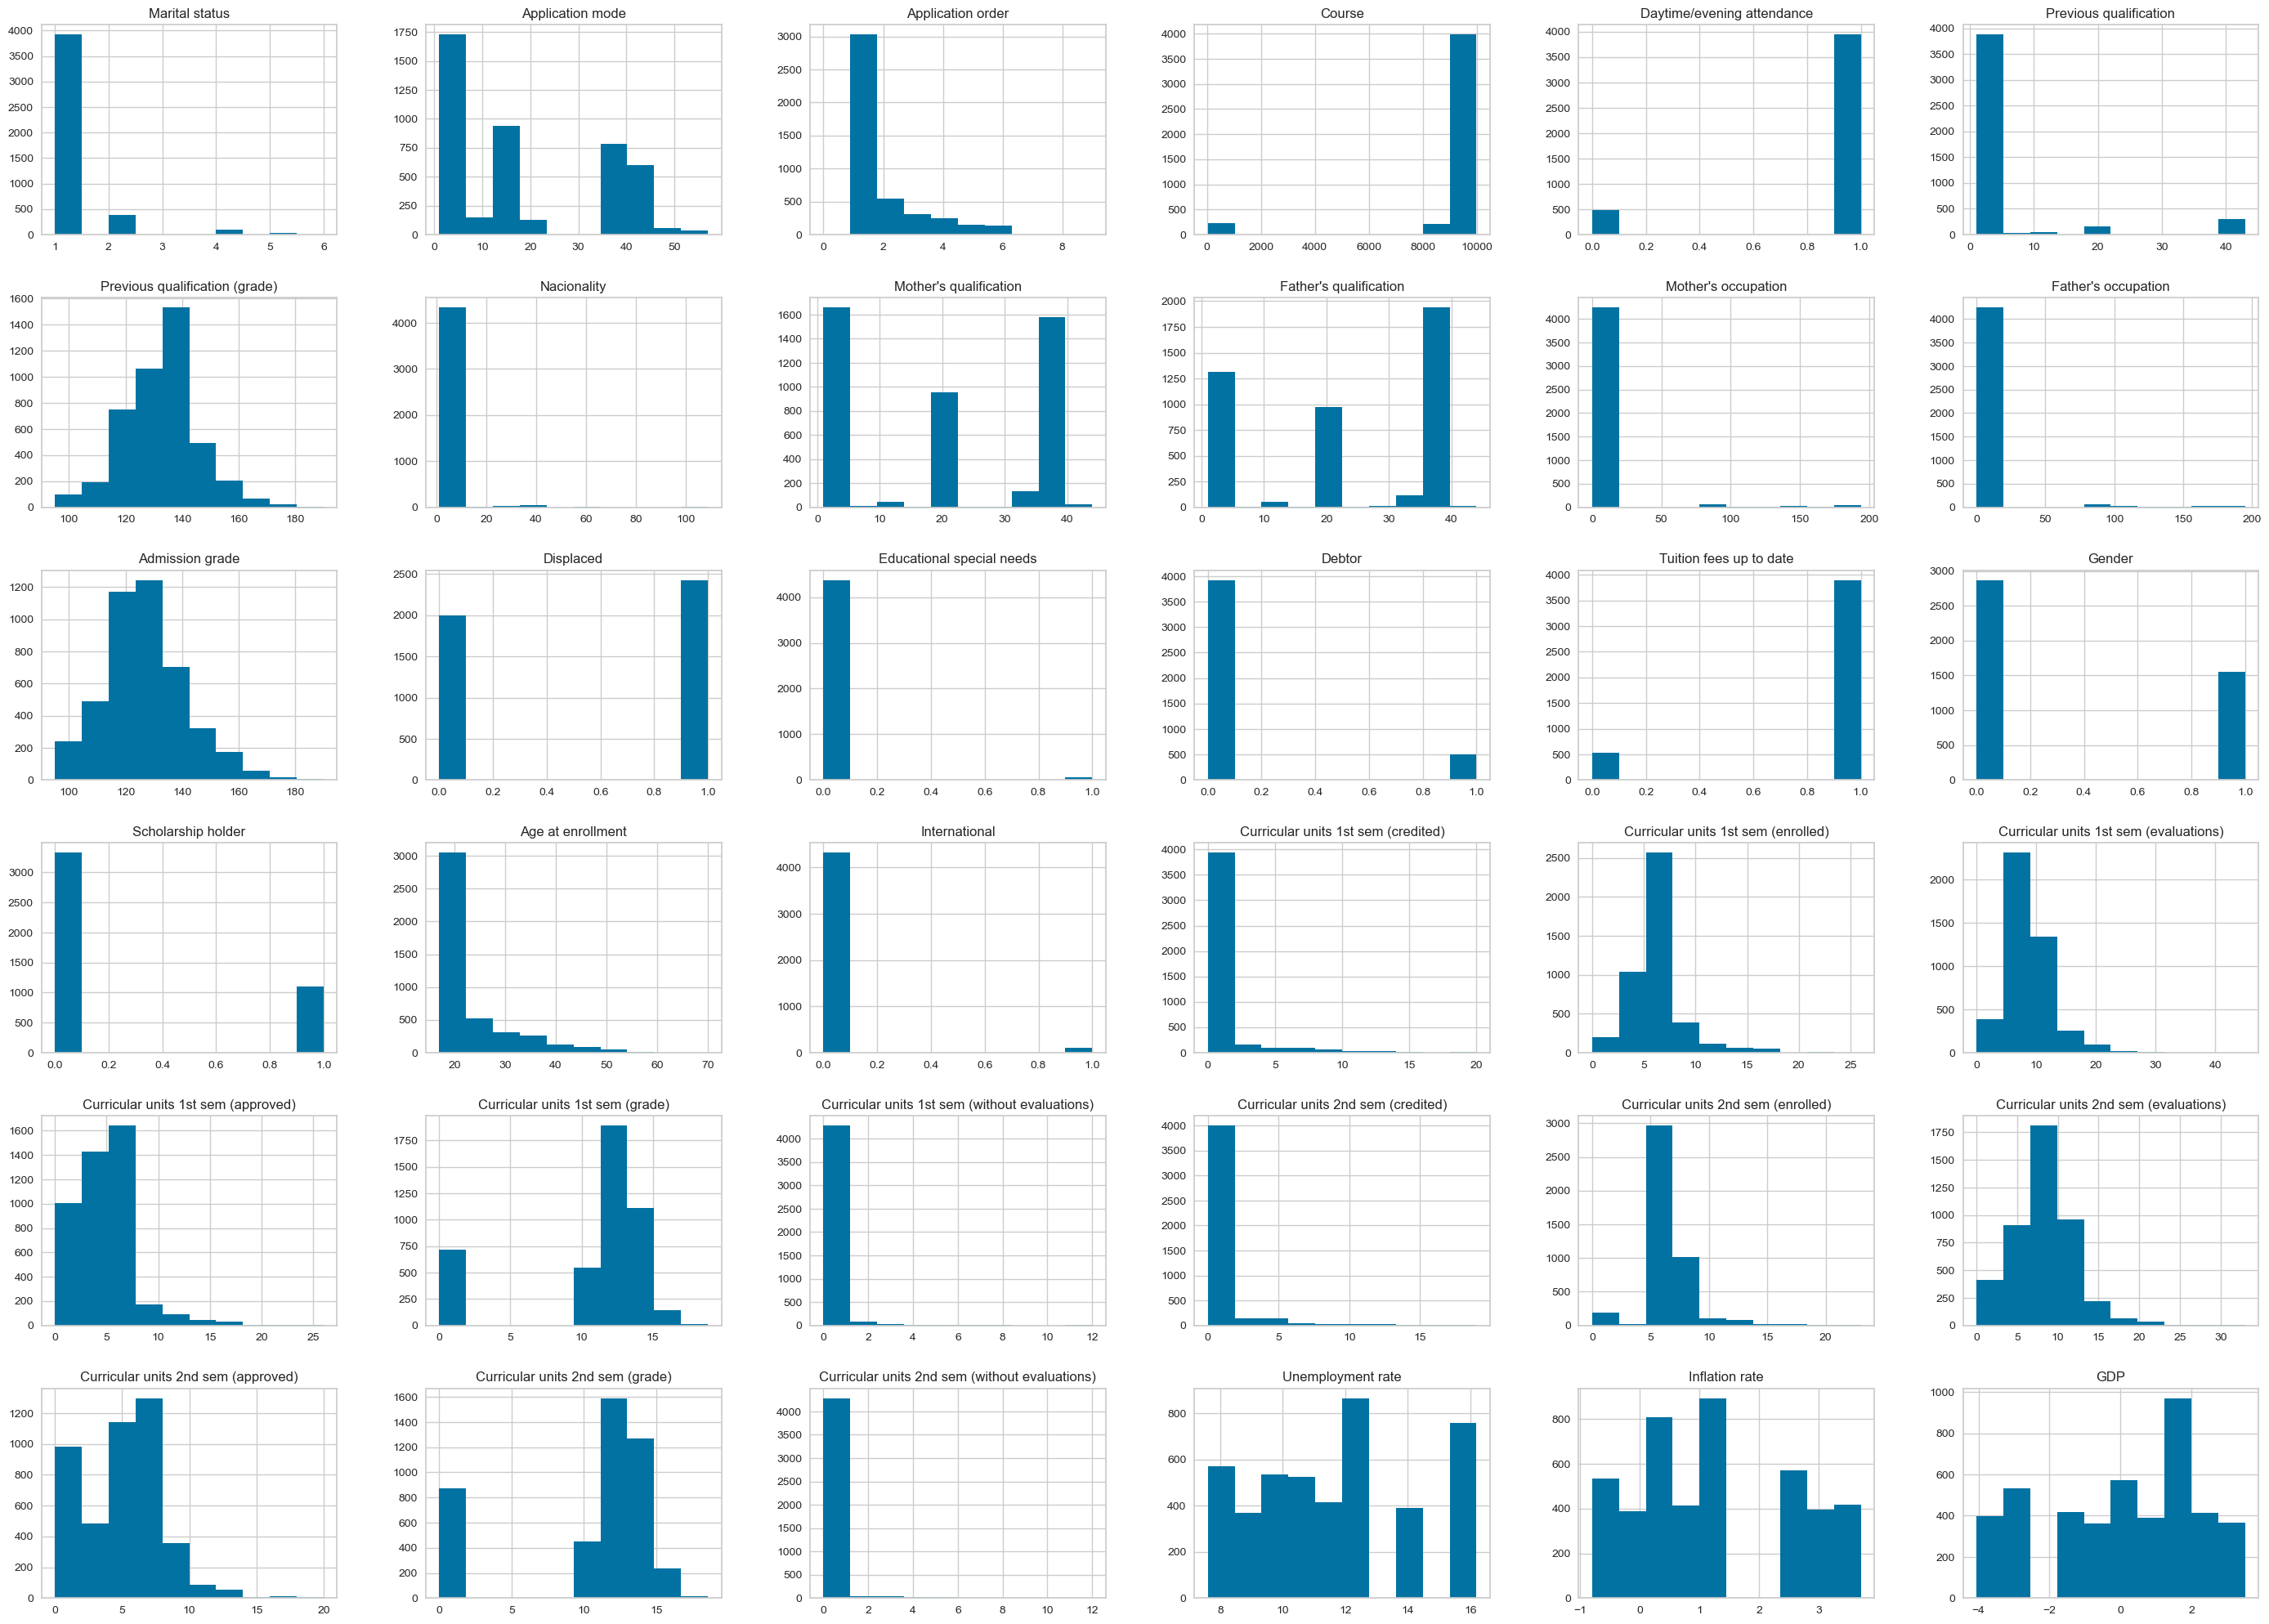

In [11]:
# Plot histograms for all features
df.hist(figsize=(35,25))
plt.show()

#### Distribution of target feature

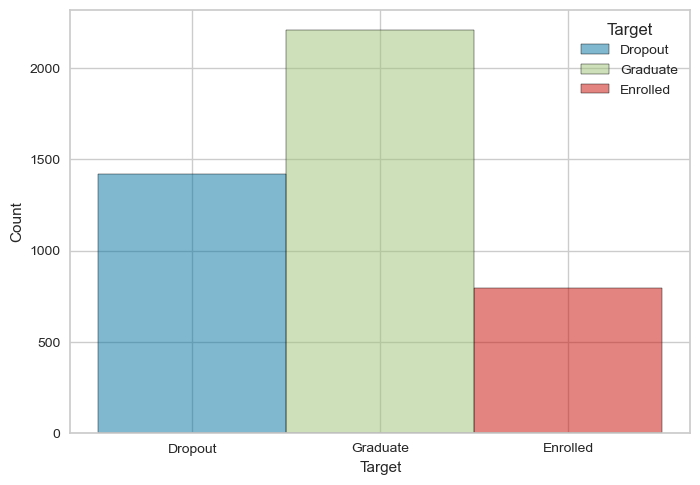

In [12]:
# Plot the distribution of the target feature
sns.histplot(data=df, x='Target', hue='Target', kde=False)
plt.show()

In [13]:
# Calculate the number and percentage of instances for each category in the target feature
counts = df['Target'].value_counts()
percentages = 100 * counts / sum(counts)

print("Number of instances for each category:")
print(counts)
print("\nPercentage of instances for each category:")
print(percentages.round(2))

Number of instances for each category:
Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

Percentage of instances for each category:
Graduate    49.93
Dropout     32.12
Enrolled    17.95
Name: Target, dtype: float64


### Feature Engineering

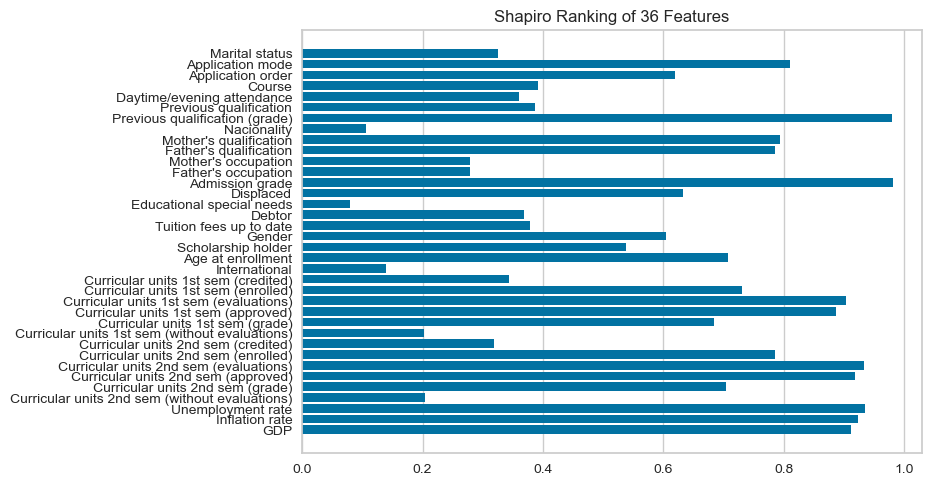

['Tuition fees up to date', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Previous qualification', 'Previous qualification (grade)', 'Application mode', 'Application order', 'Course']


In [4]:
from yellowbrick.features import Rank1D

feature_names = df.columns.tolist()
feature_names.remove('Target')

target_name = 'Target'

X = df[feature_names]
Y = df[target_name]

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=feature_names, algorithm='shapiro')

visualizer.fit(X, Y)
visualizer.transform(X)
visualizer.poof()

# Get the top 10 most important features
feature_importances = visualizer.features_
top_features = sorted(feature_importances, key=lambda x: x[1], reverse=True)[:18]
print(top_features)

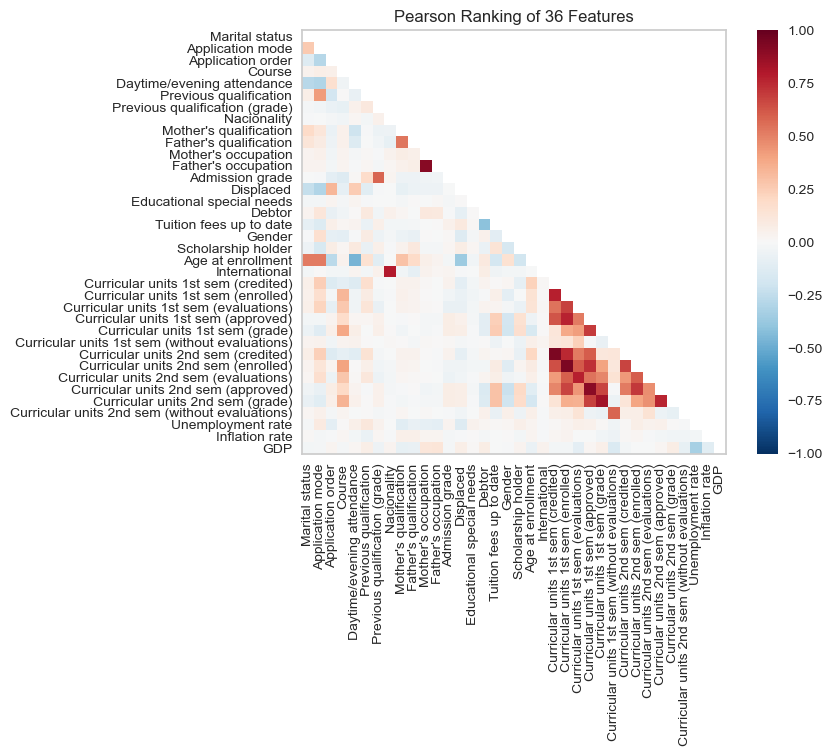

<AxesSubplot:title={'center':'Pearson Ranking of 36 Features'}>

In [5]:
from yellowbrick.features import Rank2D 

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=feature_names, algorithm='pearson')

visualizer.fit(X, Y)                
visualizer.transform(X)    
visualizer.poof()

In [6]:
corr_matrix = df.corr()
collinear_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.55:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            collinear_features.add(colname_i)
            collinear_features.add(colname_j)

# Print the collinear feature pairs
print("Collinear feature pairs:")
print(collinear_features)
print(len(collinear_features))

Collinear feature pairs:
{'Previous qualification (grade)', 'Curricular units 2nd sem (without evaluations)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (approved)', "Father's occupation", 'Curricular units 1st sem (enrolled)', 'International', 'Admission grade', 'Curricular units 1st sem (without evaluations)', "Mother's occupation", 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (evaluations)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (credited)', 'Nacionality'}
18


### Selected features

In [71]:
selected_features = ['Curricular units 2nd sem (grade)', 
'Curricular units 1st sem (grade)', 
'Curricular units 2nd sem (credited)', 
'Curricular units 1st sem (credited)', 
'Curricular units 2nd sem (approved)', 
'Curricular units 1st sem (approved)', 
'Curricular units 2nd sem (without evaluations)', 
'Curricular units 1st sem (without evaluations)', 
'Curricular units 1st sem (evaluations)', 
'Curricular units 2nd sem (evaluations)', 
'Curricular units 2nd sem (enrolled)', 
'Curricular units 1st sem (enrolled)',
'Admission grade', 
'Application mode', 
'Application order', 
'Course',
'Previous qualification (grade)', 
'Tuition fees up to date']

### Clustering

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def elbow_method(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    sum_of_squared_distances = []
    k_range = range(1,10)
    for k in k_range:
        km = KMeans(n_clusters=k)
        km = km.fit(X_scaled)
        sum_of_squared_distances.append(km.inertia_)

    plt.plot(k_range, sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()   

In [41]:
from sklearn.cluster import KMeans

def cluster_data(k, X):    
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    return kmeans

In [43]:
def print_and_plot_size_and_distribution_of_each_cluster(k, labels):
    # print the size and distribution of each cluster
    for i in range(k):
        cluster_size = sum(labels == i)
        print(f"Cluster {i+1} size: {cluster_size}")
        print(f"Cluster {i+1} distribution: {cluster_size / len(labels) * 100:.2f}%")
        
    # add cluster labels to the original dataset
    X_clustered = pd.concat([pd.DataFrame(X), pd.Series(kmeans.labels_, name='cluster')], axis=1)

    # plot histogram of cluster sizes
    plt.hist(X_clustered['cluster'])
    plt.xlabel('Cluster')
    plt.ylabel('Number of samples')
    plt.show()
    
def calculate_mean_of_each_feature_per_cluster(labels):
   # add new column in data frame
    cluster_df = pd.DataFrame({'Cluster': labels})
    df_clustered = pd.concat([df, cluster_df], axis=1)
    cluster_features = df_clustered.groupby('Cluster').mean()

    # apply different styles to the table
    styled_table = cluster_features.style\
        .background_gradient(cmap='viridis', low=0.2, high=0.2)\
        .highlight_max(axis=0)\
        .set_caption('Cluster Features')
    
    display(styled_table) 

In [76]:
def analyze_mean_and_standard_deviation_within_each_cluster(k, labels):
    for i in range(k):
        print("Cluster ", i)
        print("Mean: \n", np.mean(X[labels == i], axis=0))
        print("Std: \n", np.std(X[labels == i], axis=0))
        print("\n\n")

In [145]:
import matplotlib.pyplot as plt

def plot_distribution_of_each_feature_per_cluster(X, labels, rows=6):
    # create subplots for each feature
    fig, axs = plt.subplots(nrows=rows, ncols=3, figsize=(15, 25))

    # loop through each feature and plot its distribution for each cluster
    for i, feature in enumerate(X):
        row = i // 3
        col = i % 3
        ax = axs[row][col]
        for label in set(labels):
            ax.hist(df.loc[labels==label, feature], alpha=0.5, label=f'Cluster {label}')
        ax.axvline(x=centroids[0, i], linestyle='--', color='k', label='Centroid 0')
        ax.axvline(x=centroids[1, i], linestyle='--', color='r', label='Centroid 1')
        ax.axvline(x=centroids[2, i], linestyle='--', color='g', label='Centroid 2')
        ax.set_title(f'{feature} Distribution by Cluster')
        ax.legend()

    plt.tight_layout()
    plt.show()

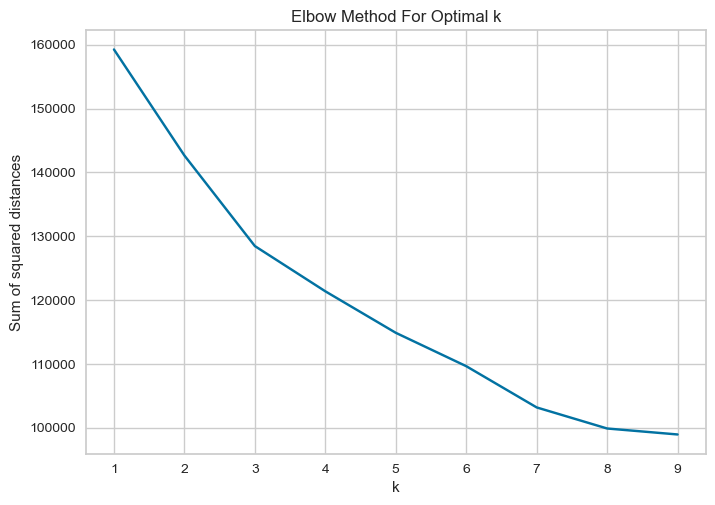

In [140]:
# Clustering on whole dataset (except 'Target')

X = df.drop('Target', axis=1)
elbow_method(X)

Cluster 1 size: 1911
Cluster 1 distribution: 43.20%
Cluster 2 size: 227
Cluster 2 distribution: 5.13%
Cluster 3 size: 2286
Cluster 3 distribution: 51.67%


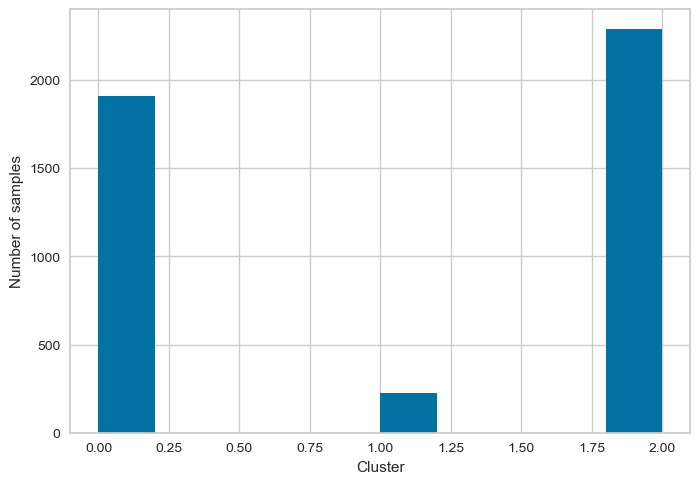

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.194139,16.987964,1.981162,9677.971219,0.859759,2.800105,132.561015,1.856620,20.138671,22.568289,10.335426,10.290424,126.385557,0.569859,0.011512,0.087912,0.900576,0.287807,0.282051,22.969649,0.022501,0.406070,6.696494,8.200419,5.198849,11.505157,0.104657,0.340659,6.845631,8.115123,5.146520,11.156566,0.147567,11.563318,1.293982,-0.121062
1,1.017621,11.568282,1.511013,163.704846,1.000000,3.008811,137.393833,2.960352,15.471366,18.638767,6.801762,7.158590,135.225991,0.779736,0.022026,0.149780,0.859031,0.555066,0.229075,20.775330,0.044053,1.458150,2.603524,2.938326,2.229075,2.469956,0.000000,1.140969,2.396476,3.048458,1.920705,2.448296,0.039648,11.455947,1.151982,0.172115
2,1.181540,20.779528,1.537620,9033.255906,0.905949,6.219598,132.182327,1.779090,19.486002,22.391514,11.896763,12.037183,126.654462,0.507437,0.010499,0.131671,0.866142,0.384952,0.222222,23.759405,0.024934,0.889764,6.278653,8.913823,4.541120,10.729641,0.178915,0.650481,6.100175,8.517935,4.091426,10.228552,0.163605,11.579440,1.180446,0.087922


In [141]:
chosen_k = 3
kmeans = cluster_data(chosen_k, X)

labels = kmeans.labels_
print_and_plot_size_and_distribution_of_each_cluster(chosen_k, labels)
calculate_mean_of_each_feature_per_cluster(labels)

In [146]:
#analyze_mean_and_standard_deviation_within_each_cluster(chosen_k, labels)
#plot_distribution_of_each_feature_per_cluster(X, labels, 36)

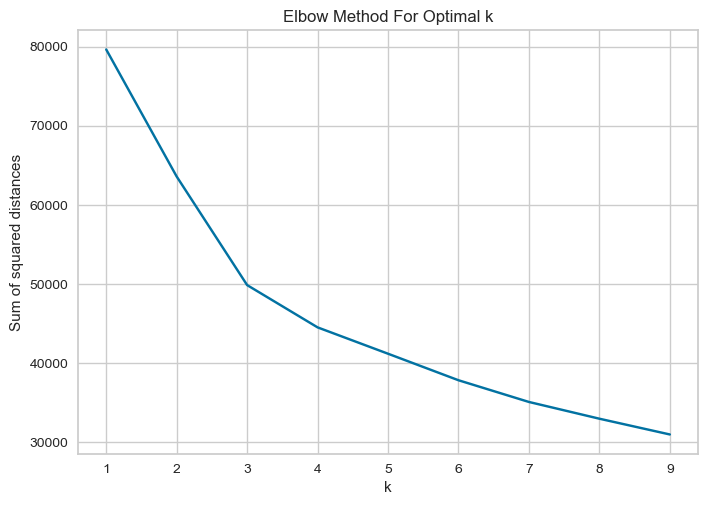

In [130]:
# Clustering on academic features
if 'Target' in selected_features:
    selected_features.remove('Target')
X = df[selected_features]
elbow_method(X)

Cluster 1 size: 1911
Cluster 1 distribution: 43.20%
Cluster 2 size: 227
Cluster 2 distribution: 5.13%
Cluster 3 size: 2286
Cluster 3 distribution: 51.67%


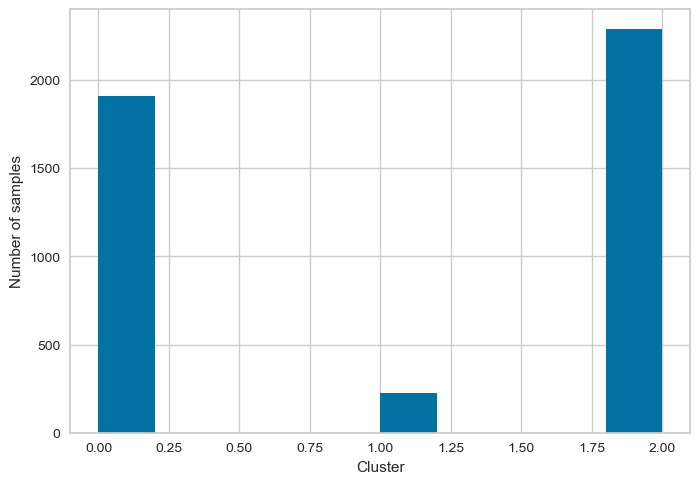

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.194139,16.987964,1.981162,9677.971219,0.859759,2.800105,132.561015,1.856620,20.138671,22.568289,10.335426,10.290424,126.385557,0.569859,0.011512,0.087912,0.900576,0.287807,0.282051,22.969649,0.022501,0.406070,6.696494,8.200419,5.198849,11.505157,0.104657,0.340659,6.845631,8.115123,5.146520,11.156566,0.147567,11.563318,1.293982,-0.121062
1,1.017621,11.568282,1.511013,163.704846,1.000000,3.008811,137.393833,2.960352,15.471366,18.638767,6.801762,7.158590,135.225991,0.779736,0.022026,0.149780,0.859031,0.555066,0.229075,20.775330,0.044053,1.458150,2.603524,2.938326,2.229075,2.469956,0.000000,1.140969,2.396476,3.048458,1.920705,2.448296,0.039648,11.455947,1.151982,0.172115
2,1.181540,20.779528,1.537620,9033.255906,0.905949,6.219598,132.182327,1.779090,19.486002,22.391514,11.896763,12.037183,126.654462,0.507437,0.010499,0.131671,0.866142,0.384952,0.222222,23.759405,0.024934,0.889764,6.278653,8.913823,4.541120,10.729641,0.178915,0.650481,6.100175,8.517935,4.091426,10.228552,0.163605,11.579440,1.180446,0.087922


In [131]:
chosen_k = 3
kmeans = cluster_data(chosen_k, X)

labels = kmeans.labels_
print_and_plot_size_and_distribution_of_each_cluster(chosen_k, labels)
calculate_mean_of_each_feature_per_cluster(labels)

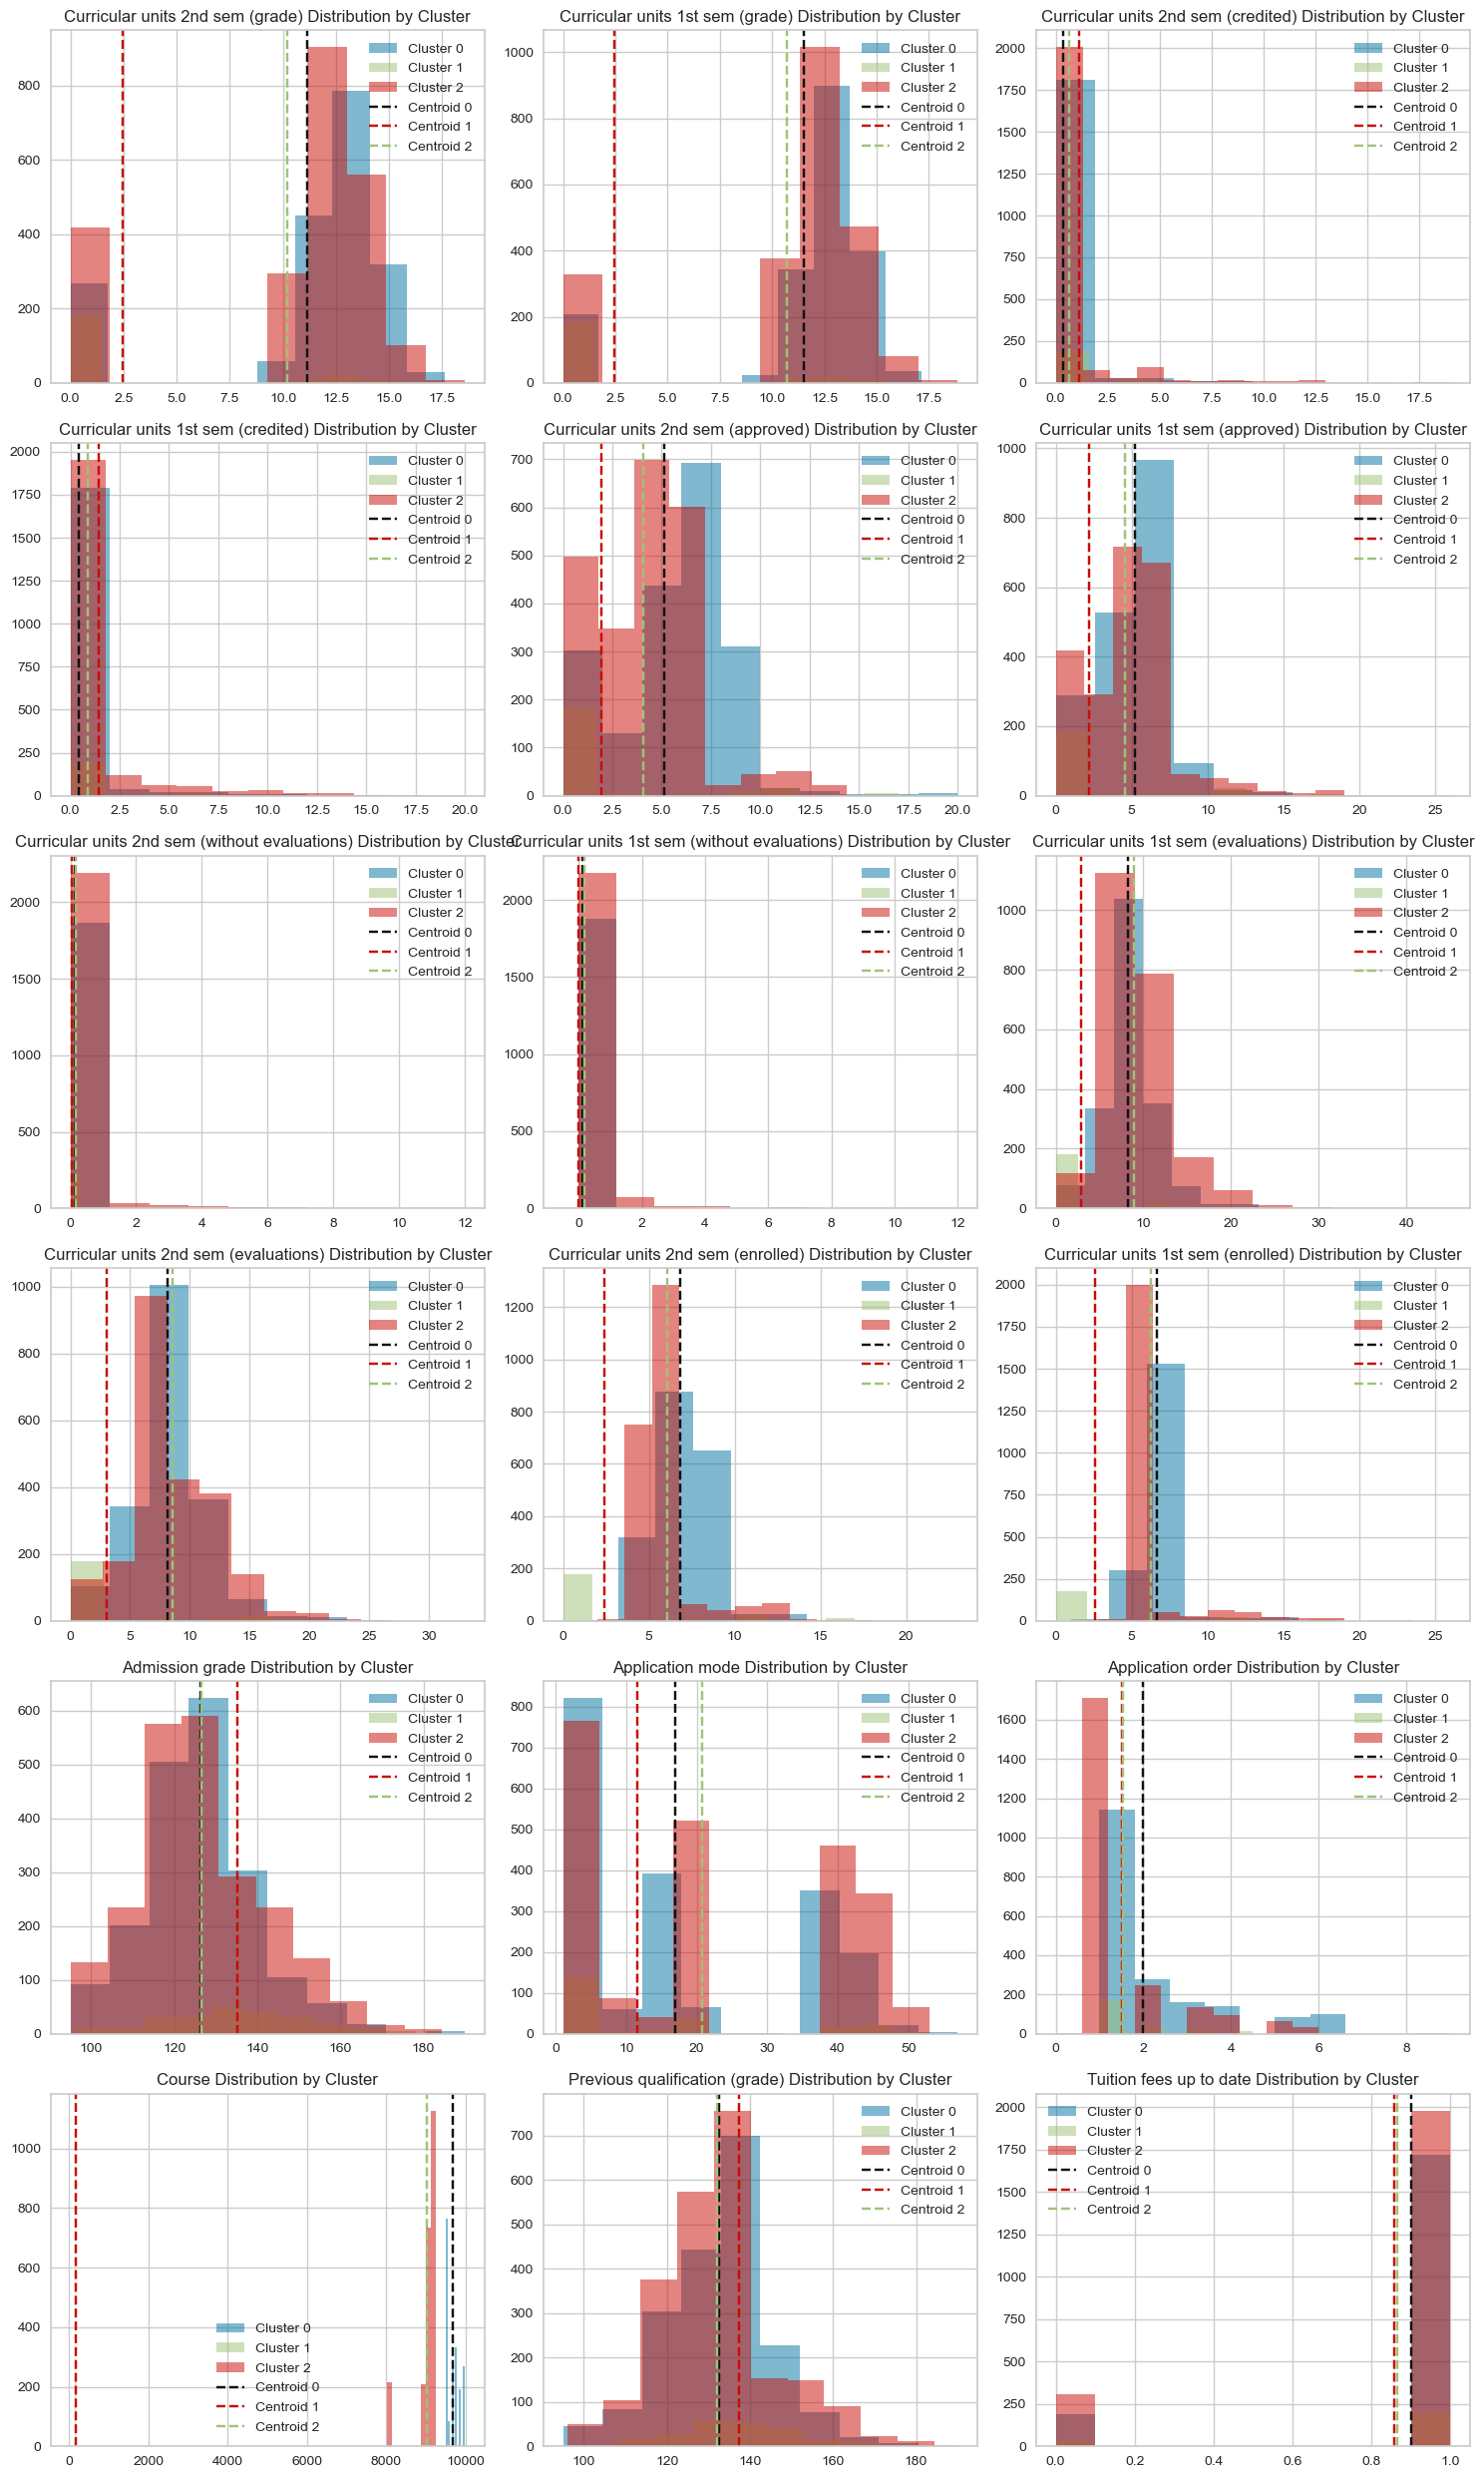

In [132]:
#analyze_mean_and_standard_deviation_within_each_cluster(chosen_k, labels)
plot_distribution_of_each_feature_per_cluster(X, labels)

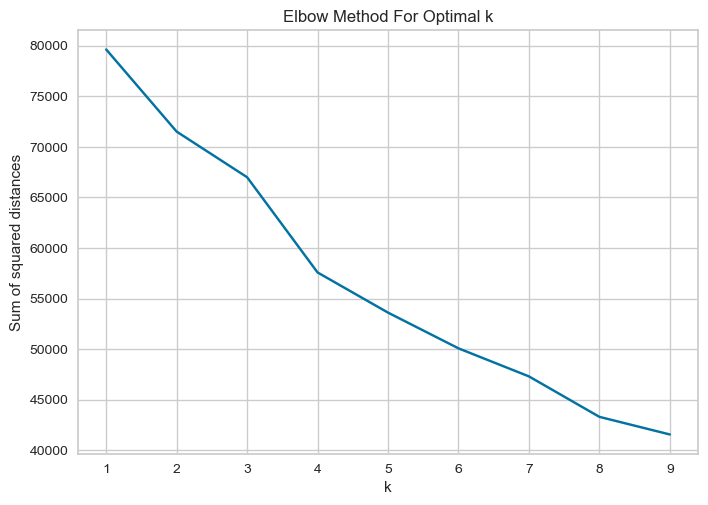

In [133]:
# Clustering on socio-economic features

selected_features.append('Target')
X = df.drop(selected_features, axis=1)
elbow_method(X)

Cluster 1 size: 2329
Cluster 1 distribution: 52.64%
Cluster 2 size: 156
Cluster 2 distribution: 3.53%
Cluster 3 size: 1939
Cluster 3 distribution: 43.83%


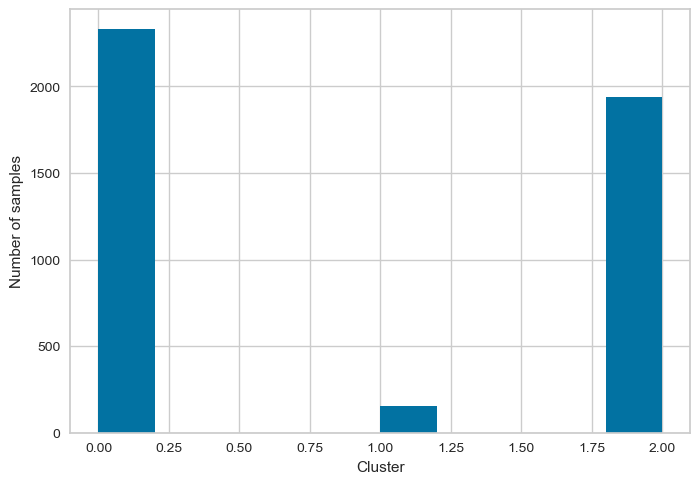

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.079004,16.518248,1.820524,8755.378703,0.951481,4.541005,133.253113,2.160584,7.844568,11.819236,5.249034,5.969515,127.664620,0.592529,0.012881,0.106913,0.888364,0.374410,0.224560,21.234006,0.030915,0.584800,6.143409,8.075569,4.714899,10.746431,0.139974,0.449549,6.166595,7.974238,4.469300,10.359539,0.139974,11.895663,1.140704,0.108549
1,1.326923,23.570513,1.487179,9142.064103,0.846154,5.570513,131.623077,2.935897,22.897436,24.583333,137.371795,131.993590,123.533333,0.384615,0.012821,0.256410,0.871795,0.378205,0.147436,26.032051,0.051282,0.788462,6.198718,8.403846,4.102564,9.736775,0.198718,0.506410,6.019231,7.826923,3.615385,9.054059,0.160256,10.086538,1.456410,1.345833
2,1.286230,20.858174,1.635895,8955.310985,0.821558,4.542032,131.924497,1.442496,33.367715,34.648788,7.651367,7.381640,126.430686,0.508510,0.009799,0.110366,0.872099,0.322331,0.285199,25.482207,0.015472,0.854048,6.429087,8.559051,4.745229,10.586704,0.129964,0.655493,6.328004,8.189273,4.461578,10.169485,0.161939,11.289376,1.314544,-0.234167


In [134]:
chosen_k = 3
kmeans = cluster_data(chosen_k, X)

labels = kmeans.labels_
print_and_plot_size_and_distribution_of_each_cluster(chosen_k, labels)
calculate_mean_of_each_feature_per_cluster(labels)

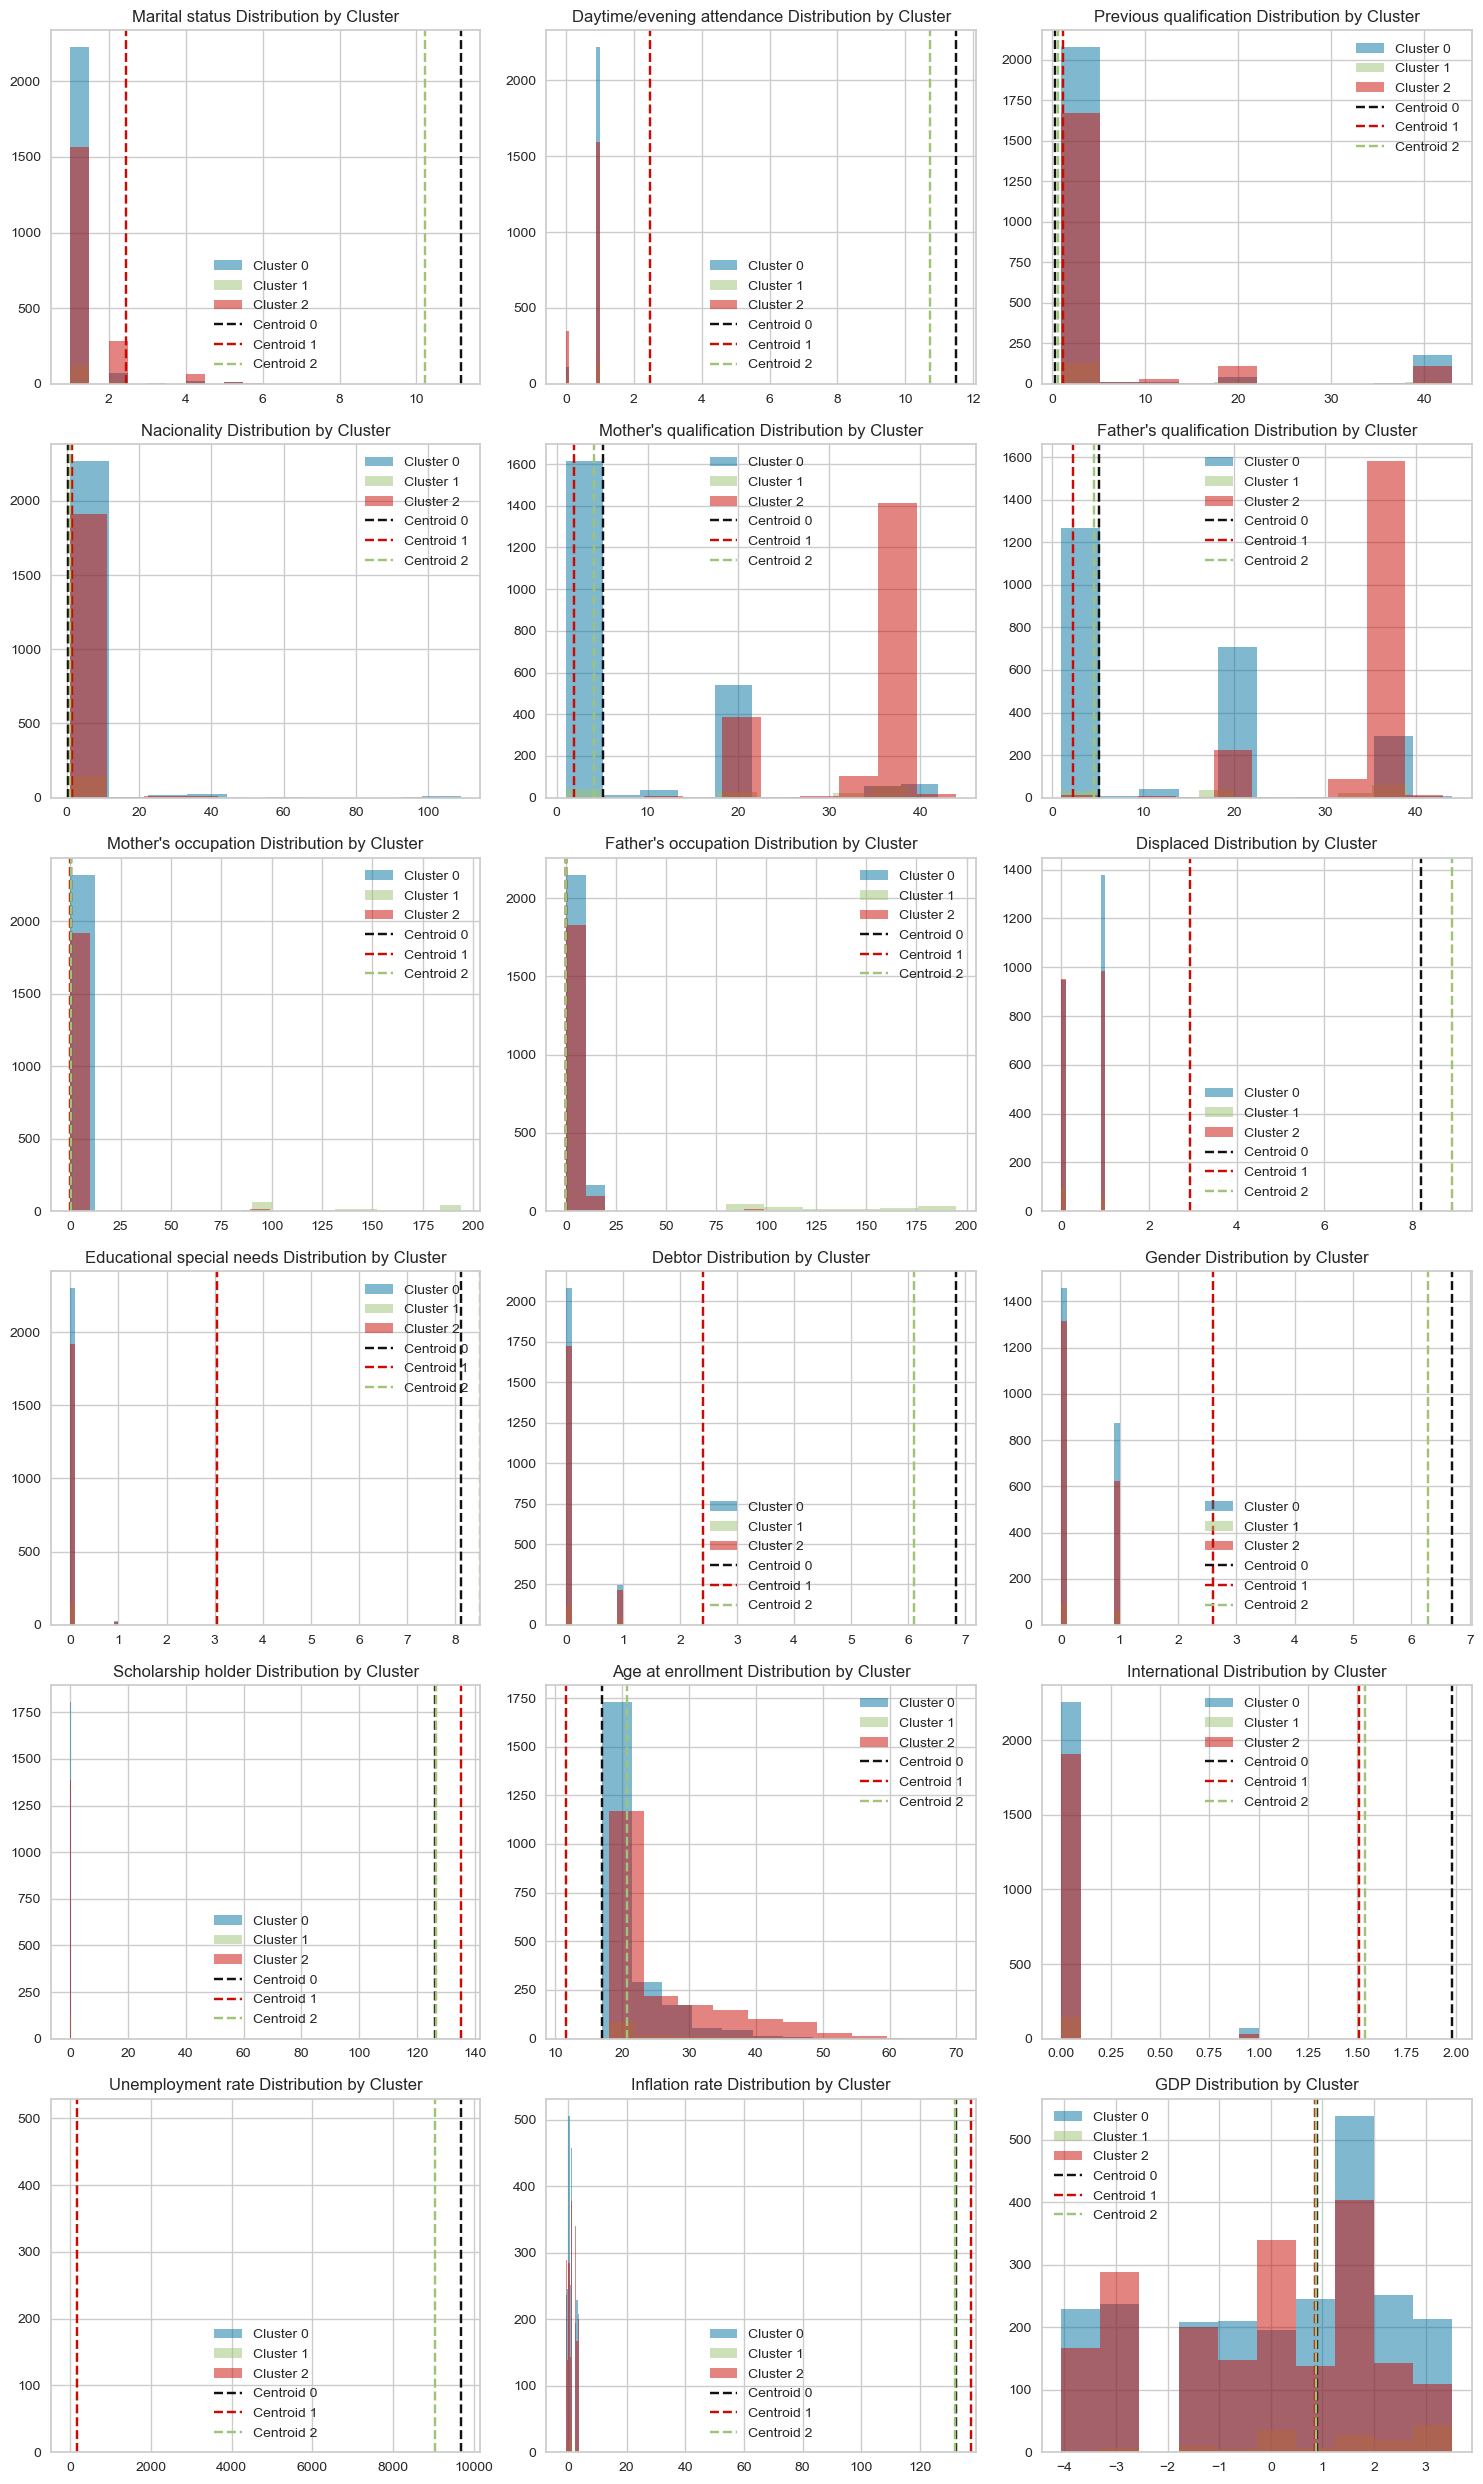

In [135]:
#analyze_mean_and_standard_deviation_within_each_cluster(chosen_k, labels)
plot_distribution_of_each_feature_per_cluster(X, labels)